# Kaggle House Price Prediction Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
pd.options.display.max_rows = 100

## Exploratory Data Analysis

In [3]:
df_orig = pd.read_csv('data/house-prices-regression/train.csv', index_col='Id')
df_orig.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
numeric_columns = df_orig.select_dtypes(include=['number']).columns
categorical_columns = df_orig.select_dtypes(include=['object']).columns

In [5]:
df_orig.shape

(1460, 80)

In [6]:
df_orig.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### First focus : numerical features

In [8]:
df_orig.describe().transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [9]:
df_num = df_orig.select_dtypes(include = 'number')
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
2           20         80.0     9600            6            8       1976   
3           60         68.0    11250            7            5       2001   
4           70         60.0     9550            7            5       1915   
5           60         84.0    14260            8            5       2000   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
Id                                                    ...               
1           2003       196.0         706           0  ...           0   
2           1976         0.0         978           0  ...         298   
3           2002       162.0         486           0  ...           0   
4           1970         0.0         216           0  ...           0   
5           2000       350.0         655           0  ...         192   

    OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
Id                                                                          
1            61              0          0            0         0        0   
2             0              0          0            0         0        0   
3            42              0          0            0         0        0   
4            35            272          0            0         0        0   
5            84              0          0            0         0        0   

    MoSold  YrSold  SalePrice  
Id                             
1        2    2008     208500  
2        5    2007     181500  
3        9    2008     223500  
4        2    2006     140000  
5       12    2008     250000  

[5 rows x 37 columns]

These are the numerical columns:

In [10]:
print(list(df_num.columns))

len(df_num.columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


37

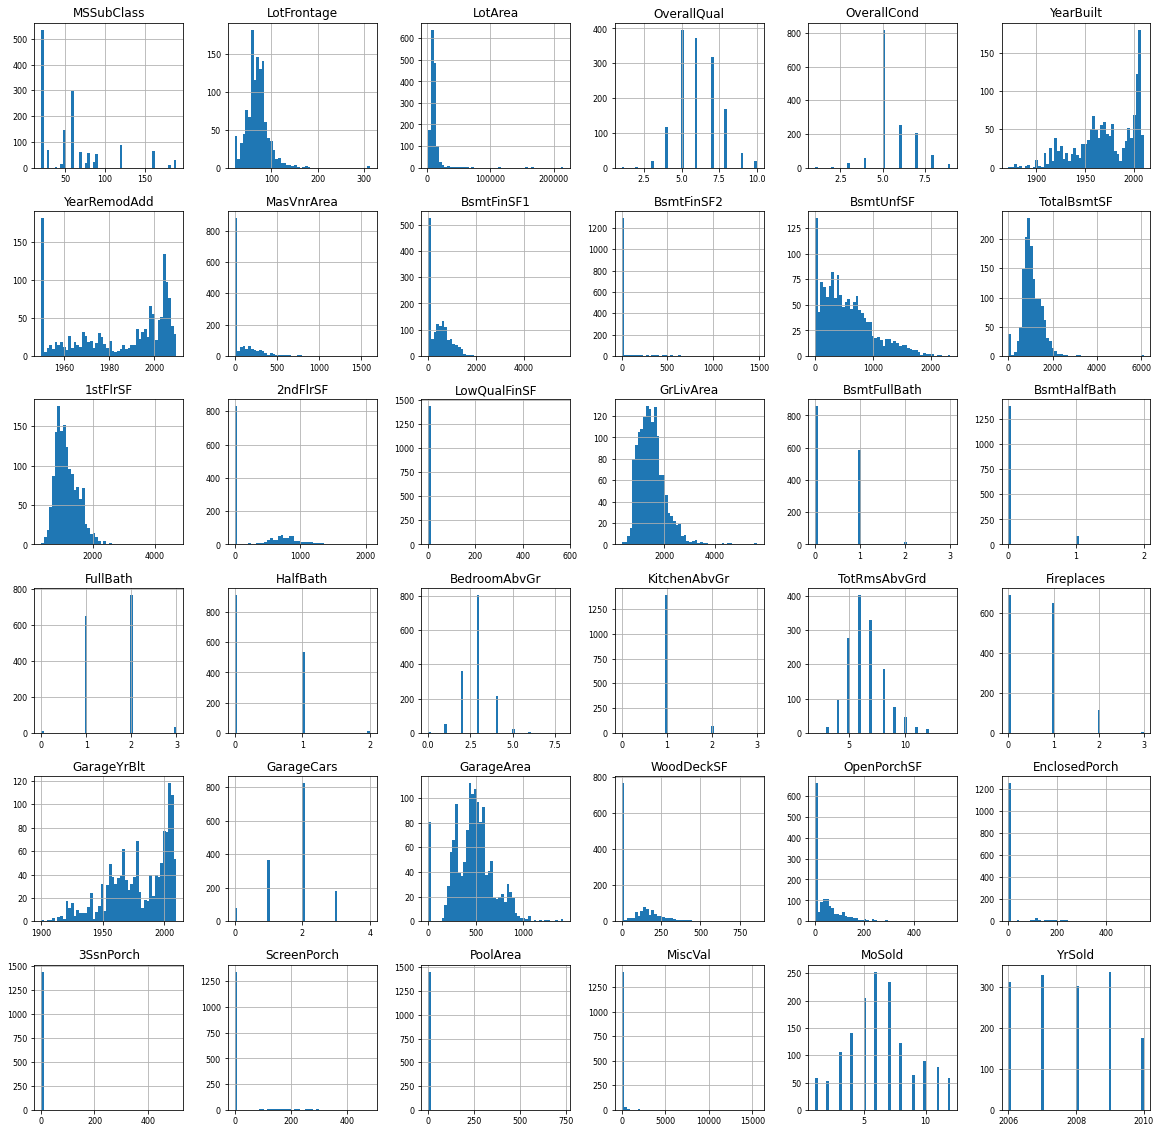

In [11]:
df_num.iloc[:,:-1].hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

There are 36 numerical features other than `SalePrice`, let us look at their bivariate plots with `SalePrice`

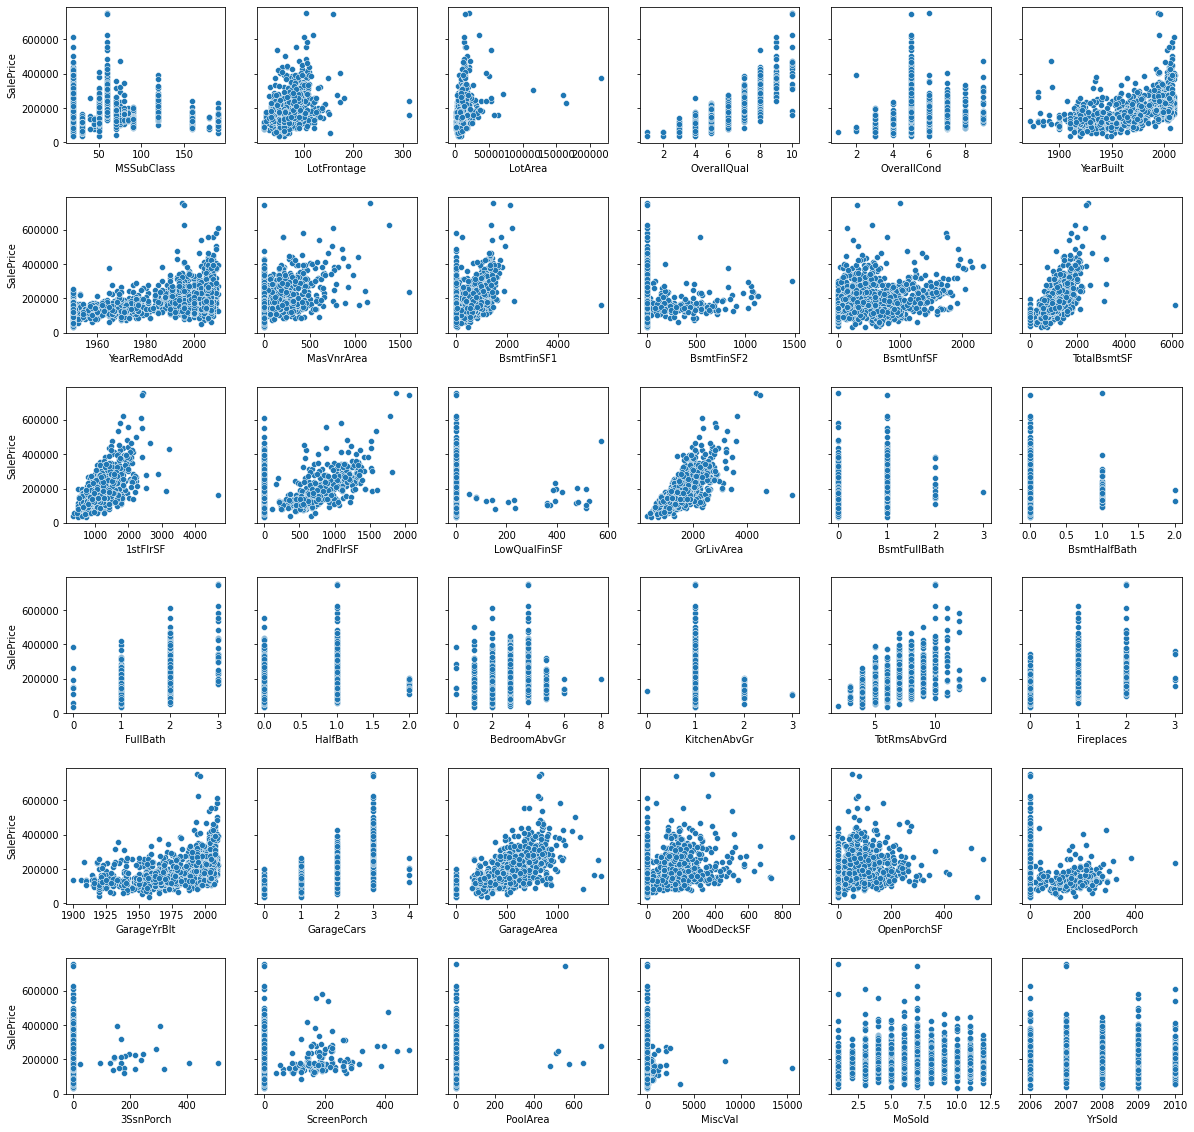

In [12]:
fig, axes = plt.subplots(6, 6, figsize=(20, 20), sharey=True)

for i in range(len(df_num.columns) - 1):
    sns.scatterplot(ax = axes.flat[i], data=df_num, x=df_num.columns[i], y='SalePrice')

fig.subplots_adjust(hspace=0.4)
plt.plot();

### Second focus : categorical features

In [13]:
df_orig = df_orig.fillna(df_orig.median())
df_orig = df_orig.fillna('Nope')

In [14]:
df_cate = df_orig.select_dtypes(include = 'object')
df_cate['SalePrice'] = df_orig['SalePrice']
df_cate.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                            
1        RL   Pave  Nope      Reg         Lvl    AllPub    Inside       Gtl   
2        RL   Pave  Nope      Reg         Lvl    AllPub       FR2       Gtl   
3        RL   Pave  Nope      IR1         Lvl    AllPub    Inside       Gtl   
4        RL   Pave  Nope      IR1         Lvl    AllPub    Corner       Gtl   
5        RL   Pave  Nope      IR1         Lvl    AllPub       FR2       Gtl   

   Neighborhood Condition1  ... GarageFinish GarageQual GarageCond PavedDrive  \
Id                          ...                                                 
1       CollgCr       Norm  ...          RFn         TA         TA          Y   
2       Veenker      Feedr  ...          RFn         TA         TA          Y   
3       CollgCr       Norm  ...          RFn         TA         TA          Y   
4       Crawfor       Norm  ...          Unf         TA         TA          Y   
5       NoRidge       Norm  ...          RFn         TA         TA          Y   

   PoolQC Fence MiscFeature SaleType SaleCondition SalePrice  
Id                                                            
1    Nope  Nope        Nope       WD        Normal    208500  
2    Nope  Nope        Nope       WD        Normal    181500  
3    Nope  Nope        Nope       WD        Normal    223500  
4    Nope  Nope        Nope       WD       Abnorml    140000  
5    Nope  Nope        Nope       WD        Normal    250000  

[5 rows x 44 columns]

These are the categorical columns:

In [15]:
print(list(df_cate.columns)[:-1])

len(df_cate.columns[:-1])

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


43

In [16]:
df_cate.describe(include=['object']).transpose()

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley          1460      3     Nope  1369
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1460      5     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1460      5       TA   649
BsmtCond       1460      5       TA  1311
BsmtExposure   1460      5       No   953
BsmtFinType1   1460      7      Unf   430
BsmtFinType2   1460      7      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1460      6    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu    1460      6     Nope   690
GarageType     1460      7   Attchd   870
GarageFinish   1460      4      Unf   605
GarageQual     1460      6       TA  1311
GarageCond     1460      6       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC         1460      4     Nope  1453
Fence          1460      5     Nope  1179
MiscFeature    1460      5     Nope  1406
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

### Looking at the values for categorical features

In [17]:
for x in df_cate.columns[:-1]:
    print(x, '=>\n', df_cate[x].value_counts(dropna=False))
    print()

MSZoning =>
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street =>
 Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley =>
 Nope    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

LotShape =>
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour =>
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities =>
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig =>
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope =>
 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood =>
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28

Boxplots for various categorical features with `SalePrice`

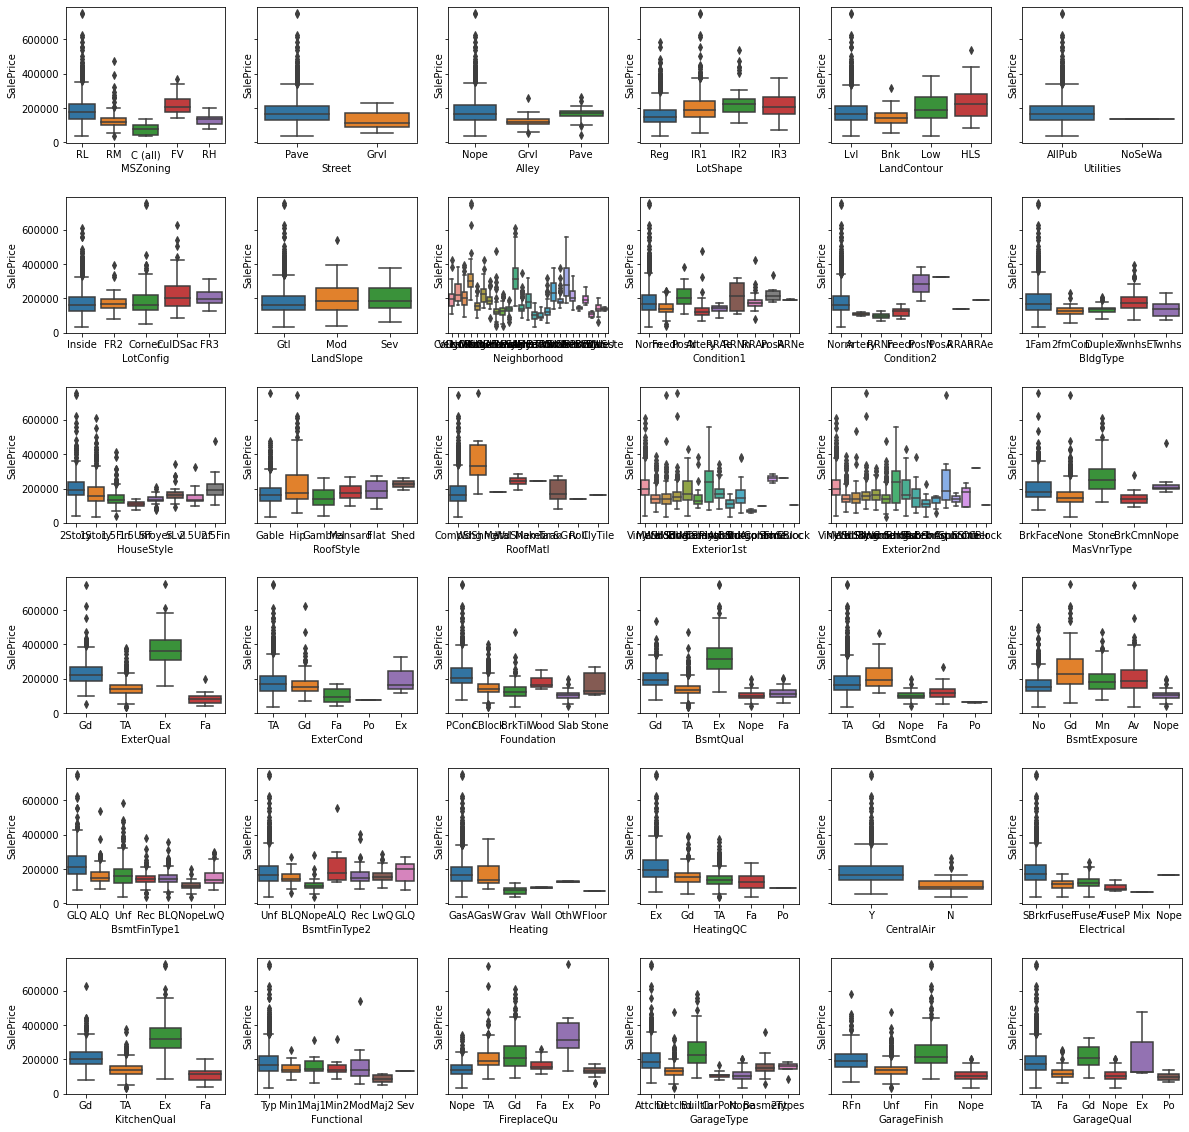

In [18]:
fig, axes = plt.subplots(6, 6, figsize=(20, 20), sharey=True)

for i in range(len(df_num.columns) - 1):
    sns.boxplot(ax = axes.flat[i], data=df_cate, x=df_cate.columns[i], y='SalePrice')

fig.subplots_adjust(hspace=0.4)
plt.plot();

## Filling missing values

Since `NaN` for some of these features indicates the absense of a specific feature in the house, we are going to replace `NaN` in some of these columns with `Nope`.

For the numerical columns, we are going to fill these with the median of that column.

In [19]:
# print(df_orig.isnull().sum())

# fills NaN data in numerical columns with median
df_train = df_orig.fillna(df_orig.median())
# print(df.isnull().sum())

# fills NaN data in categorical columns with 'Nope'
df_train = df_train.fillna('Nope')
# print(df.isnull().sum())

## Feature Engineering

Next, we can attempt to make a distinction between nominal and ordinal variables, figuring out which once can be useful for getting information about the target variable.

The ordinal variables can be assigned values in a single column, whereas the nominal features may have to be one hot encoded.

### Tackling each feature one by one

We can notice that some features, like 'MSSubClass', although numerical, are not ordinal variables and hence cannot be treated as such. We need to employ a strategy to convert them into ordinal variables.

We can group the dataframe by that column and find average values for specific categories, thus getting a value for mapping the categories. This is called target encoding.

[Link](https://maxhalford.github.io/blog/target-encoding/)

In [20]:
df_train.groupby('MSSubClass').mean()['SalePrice'].sort_values()

MSSubClass
30      95829.724638
180    102300.000000
45     108591.666667
190    129613.333333
90     133541.076923
160    138647.380952
50     143302.972222
85     147810.000000
40     156125.000000
70     166772.416667
80     169736.551724
20     185224.811567
75     192437.500000
120    200779.080460
60     239948.501672
Name: SalePrice, dtype: float64

We can see that this ordering makes sense, given that 30 stands for '1-STORY 1945 & OLDER' while 60 stands for '2-STORY 1946 & NEWER'.

#### New features -
These are the new features that I will add.

`Bath = FullBath + 0.5 * HalfBath`

#### Numerical features - 
These are the features that are numerical and will be preserved as-is. 

`['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'Bath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']`

#### Ordinal features - 
These are the features I decided to use target encoding on to get information out of the categories. 

`['MSSubClass', 'MSZoning', 'LandContour', 'LandSlope', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish', 'GarageCond', 'SaleType', 'SaleCondition']`

#### Ordinal manual features - 
These are the ordinal variables I will manually assign values to,

`['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'PavedDrive']`

#### Nominal features - 
These are the nominal features that will be assignned binary 0/1 values.

`['Street', 'LotShape', 'Utilities', 'CentralAir']`

#### To be deleted - 
These are the features I decided to delete.

`['Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', '1stFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'FullBath', 'HalfBath']`

### New features

In [21]:
df_train['Bath'] = 10 * df_train['FullBath'] + 5 * df_train['HalfBath']

### To be deleted

In [22]:
df_train.drop(axis=1, columns=['Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', '1stFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'FullBath', 'HalfBath'], inplace=True)

### Nominal features

In [23]:
df_train.Street = df_train.Street.map({'Pave' : 1, 'Grvl' : 0})
df_train.rename(columns={'Street' : 'Paved'}, inplace=True)
df_train.Paved.value_counts()

1    1454
0       6
Name: Paved, dtype: int64

In [24]:
df_train.LotShape = df_train.LotShape.map({'Reg' : 1, 'IR1' : 0, 'IR2' : 0, 'IR3' : 0})
df_train.LotShape.value_counts()

1    925
0    535
Name: LotShape, dtype: int64

In [25]:
df_train.Utilities = df_train.Utilities.map({'AllPub' : 1, 'NoSewr' : 0, 'NoSeWa' : 0, 'ELO' : 0})
df_train.Utilities.value_counts()

1    1459
0       1
Name: Utilities, dtype: int64

In [26]:
df_train.CentralAir = df_train.CentralAir.map({'Y' : 1, 'N' : 0})
df_train.CentralAir.value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

### Ordinal manual features

First, we create the mapping, for the ordinal features. These features are mapped to integer values that are decided on the basis of the average value of the target variable.

We store this in a dictionary so that we can later use the same mapping on the test set.

In [27]:
mp = {}

for fea in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'PavedDrive']:
    ord = df_train.groupby(fea).mean()['SalePrice'].sort_values().index.to_list()
    mp[fea] = dict(zip(ord, range(len(ord))))

mp

{'ExterQual': {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3},
 'ExterCond': {'Po': 0, 'Fa': 1, 'Gd': 2, 'TA': 3, 'Ex': 4},
 'BsmtQual': {'Nope': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
 'BsmtCond': {'Po': 0, 'Nope': 1, 'Fa': 2, 'TA': 3, 'Gd': 4},
 'BsmtExposure': {'Nope': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
 'HeatingQC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
 'KitchenQual': {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3},
 'Functional': {'Maj2': 0,
  'Sev': 1,
  'Min2': 2,
  'Min1': 3,
  'Maj1': 4,
  'Mod': 5,
  'Typ': 6},
 'FireplaceQu': {'Po': 0, 'Nope': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'GarageQual': {'Po': 0, 'Nope': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'PavedDrive': {'N': 0, 'P': 1, 'Y': 2}}

Now we will apply the mapping on the training set.

In [28]:
for k in mp:
    df_train[k] = df_train[k].map(mp[k])

In [29]:
df_train.loc[:, ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'PavedDrive']].head()

ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  HeatingQC  \
Id                                                                      
1           2          3         3         3             1          4   
2           1          3         3         3             4          4   
3           2          3         3         3             2          4   
4           1          3         2         4             1          3   
5           2          3         3         3             3          4   

    KitchenQual  Functional  FireplaceQu  GarageQual  PavedDrive  
Id                                                                
1             2           6            1           3           2  
2             1           6            3           3           2  
3             2           6            3           3           2  
4             2           6            4           3           2  
5             2           6            3           3           2

### Ordinal features (applying target encoding)

In [30]:
y = df_train.pop('SalePrice')
X = df_train

In [31]:
from category_encoders.target_encoder import TargetEncoder

In [32]:
tar_encoder = TargetEncoder(cols = ['MSSubClass', 'MSZoning', 'LandContour', 'LandSlope', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish', 'GarageCond', 'SaleType', 'SaleCondition'], drop_invariant = True, return_df = True)

tar_encoder.fit(X, y)
X = tar_encoder.transform(X, y)
X = X.astype('int64')

So this concludes the feature engineering part of the notebook.

## Testing on Model

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [34]:
import xgboost as xg 
from sklearn.metrics import mean_squared_log_error as msle

xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, seed = 7)
xgb_r.fit(X_train, y_train) 
pred = xgb_r.predict(X_test) 
  
# RMSE Computation 
rmsle = np.sqrt(msle(y_test, pred))
rmsle

0.12940204495537014

## Final Submission

### Transforming test data

In [35]:
df_test = pd.read_csv('data/house-prices-regression/test.csv', index_col='Id')
df_test = df_test.fillna(df_orig.median())
df_test = df_test.fillna('Nope')

df_test['Bath'] = df_test['FullBath'] + 0.5 * df_test['HalfBath']
df_test.drop(axis=1, columns=['Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', '1stFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'FullBath', 'HalfBath'], inplace=True)

df_test.Street = df_test.Street.map({'Pave' : 1, 'Grvl' : 0})
df_test.rename(columns={'Street' : 'Paved'}, inplace=True)
df_test.Paved.value_counts()

df_test.LotShape = df_test.LotShape.map({'Reg' : 1, 'IR1' : 0, 'IR2' : 0, 'IR3' : 0})
df_test.LotShape.value_counts()

df_test.Utilities = df_test.Utilities.map({'AllPub' : 1, 'NoSewr' : 0, 'NoSeWa' : 0, 'ELO' : 0})
df_test.Utilities.value_counts()

df_test.CentralAir = df_test.CentralAir.map({'Y' : 1, 'N' : 0})
df_test.CentralAir.value_counts()

for k in mp:
    df_test[k] = df_test[k].map(mp[k])

df_test = tar_encoder.transform(df_test)
df_test = df_test.fillna(df_test.mean())
df_test = df_test.astype('int64')

xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, seed = 7)
xgb_r.fit(X, y) 
pred = xgb_r.predict(df_test) 

In [36]:
submission = pd.read_csv('data/house-prices-regression/sample_submission.csv', index_col='Id')
submission['SalePrice'] = pred
submission.to_csv('data/house-prices-regression/01.csv')

## Saving cleaned data

In [37]:
X.shape, y.shape, df_test.shape

((1460, 53), (1460,), (1459, 53))

In [39]:
X['SalePrice'] = y
X.to_csv('data/house-prices-regression/cleaned_train.csv')
df_test.to_csv('data/house-prices-regression/cleaned_test.csv')